In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
df = pd.read_csv('../cruft/om-2023-12-23-2024-01-07.csv')
df = df[df['date'].str.contains('06:00|18:00')]
df = df[df['date'] < '2024-01-02 12:00:00']

In [3]:
dataset = xr.open_dataset('../cruft/20231223-era5.nc')
selected_data = dataset.sel(latitude=-37.814, longitude=144.9633, method='nearest')
times = selected_data.time.values
t2m = selected_data.t2m.values.flatten()

/home/ubuntu/ai-models-graphcast/venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [4]:
df['era5_2m'] = t2m - 273.15

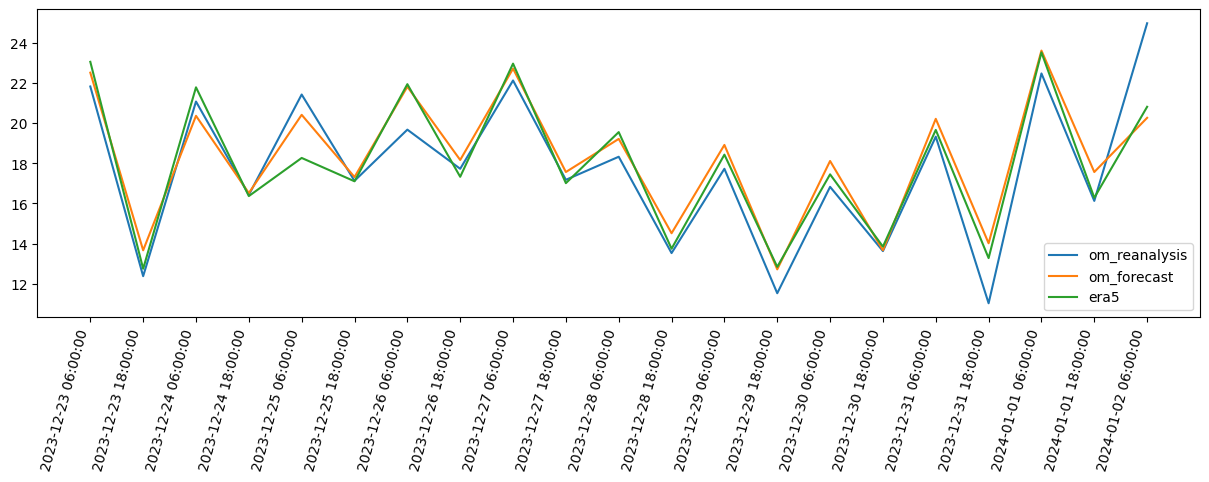

In [21]:
plt.figure(figsize=(15,4))

plt.plot(df['date'], df['temperature_2m_reanalysis'])
plt.plot(df['date'], df['temperature_2m_forcast'])
plt.plot(df['date'], df['era5_2m'])
plt.xticks(rotation=75, ha='right')
plt.legend(['om_reanalysis', 'om_forecast', 'era5'])
print()

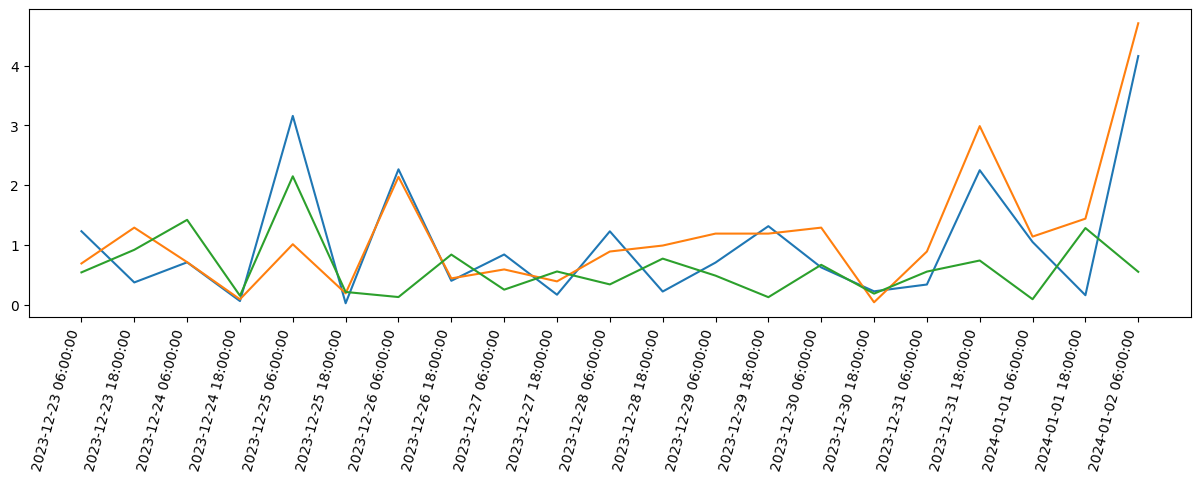

In [19]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['era5_2m']))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']))
plt.plot(df['date'], abs(df['era5_2m'] - df['temperature_2m_forcast']))
plt.xticks(rotation=75, ha='right')
print()

In [8]:
print("mean delta era5 vs reanalysis: ", abs(df['temperature_2m_reanalysis'] - df['era5_2m']).mean())
print("mean delta reanalysis vs forecast: ", abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']).mean())
print("mean delta era5 vs forecast: ", abs(df['era5_2m'] - df['temperature_2m_forcast']).mean())

mean delta era5 vs reanalysis:  1.0230037573474704
mean delta reanalysis vs forecast:  1.1564291904761905
mean delta era5 vs forecast:  0.6159322789248516
